20MAI0015 
GITHUB - 

# 16 Clustering

1. Partitioning based Methods - Kmeans
2. Hierarchial Clustering Methods - Agglomerative Clustering



In [71]:
#1IMPORTING THE DATASET
import pandas as pd
customer_df = pd.read_csv("Salary_Data.csv")
customer_df.head(5)

,age,income
0,55,80000
1,59,76000
2,45,41111
3,46,38000
4,35,44555


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


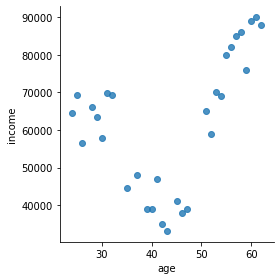

In [72]:
#importing the libraries
import numpy as np
import seaborn as sn
import matplotlib as plt
%matplotlib inline

#scatter plot of the Data
sn.lmplot("age","income",data=customer_df,fit_reg=False,size=4)

In [73]:
#3 importing k-means
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customer_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
#the output of the variable is cluster.label
customer_df["clusterid"]=clusters.labels_

In [75]:
customer_df[:10]

,age,income,clusterid
0,55,80000,2
1,59,76000,2
2,45,41111,0
3,46,38000,0
4,35,44555,0
5,62,88000,2
6,58,86000,2
7,43,33088,0
8,24,64445,1
9,61,90000,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


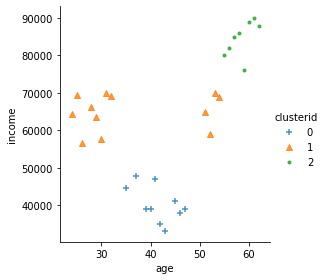

In [76]:
markers = ['+','^','.']
sn.lmplot("age","income",data = customer_df, hue ="clusterid", markers=markers, fit_reg=False,size=4)

In [77]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df= scaler.fit_transform(customer_df[["age","income"]])
scaled_customers_df[0:10]
    

array([[ 0.92523988,  1.01345132],
       [ 1.25966394,  0.78849611],
       [ 0.08917975, -1.17361942],
       [ 0.17278576, -1.34857834],
       [-0.74688039, -0.97993299],
       [ 1.51048198,  1.46336173],
       [ 1.17605793,  1.35088413],
       [-0.07803228, -1.62482333],
       [-1.66654654,  0.13865676],
       [ 1.42687597,  1.57583933]])

In [78]:
#clustering again
customer_new = KMeans(3)
customer_new.fit(scaled_customers_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
customer_df["clusterid_new"] = customer_new.labels_

In [80]:
customer_df

,age,income,clusterid,clusterid_new
0,55,80000,2,1
1,59,76000,2,1
2,45,41111,0,2
3,46,38000,0,2
4,35,44555,0,2
5,62,88000,2,1
6,58,86000,2,1
7,43,33088,0,2
8,24,64445,1,0
9,61,90000,2,1


In [81]:
#PROBLEM STATEMENT: USE bev.csv - Apply Clustering (KMeans and Agglomerative) - Compare the clusters created by both the techniques

In [82]:
bev = pd.read_csv("bev.csv")
bev.head(10)

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77
5,jacobs_coffee,145,23,4.6,0.28
6,grounds_hounds_coffee,175,24,5.5,0.40
7,la_columbe_corisca,149,27,4.7,0.42
8,lavazza_super_crema,99,10,4.3,0.43
9,mount_hagen,113,8,3.7,0.40


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


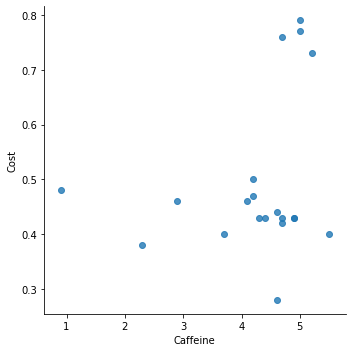

In [90]:
sn.lmplot("Caffeine","Cost", data = bev, fit_reg=False, size=5)

In [92]:
# Scaling
from sklearn.preprocessing import StandardScaler
bev_scaler = StandardScaler()
bev_df = bev_scaler.fit_transform(bev[["Potassium", "Sodium", "Caffeine","Cost"]])

In [94]:
bev_df

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [96]:
# KMeans clustering
from sklearn.cluster import KMeans
bev_clusters=KMeans(3)
bev_clusters.fit(bev_df)
bev["bev_cluster_id"] = bev_clusters.labels_

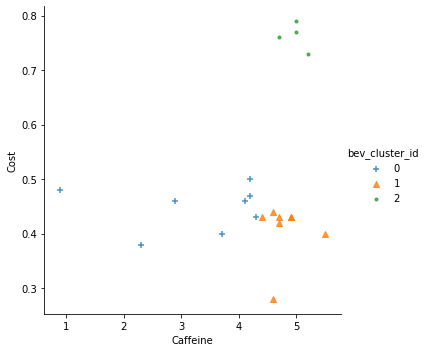

In [97]:
# plotting for new values
markers = ['+','^','.']
sn.lmplot("Caffeine","Cost", data = bev, hue = "bev_cluster_id", markers = markers, fit_reg=False, height=5)

In [104]:
for x in range(3):
  print(bev[bev.bev_cluster_id == x],"\n")

                   Name  Potassium  Sodium  Caffeine  Cost  bev_cluster_id
2      stumpdown_coffee        157      15       0.9  0.48               0
8   lavazza_super_crema         99      10       4.3  0.43               0
9           mount_hagen        113       8       3.7  0.40               0
11   peerless_wholebean        102      15       4.1  0.46               0
12  stone_street_coffee        135      11       4.2  0.50               0
15       caribou_coffee         68      15       2.3  0.38               0
18      davidoff_coffee         72       6       2.9  0.46               0
19            js_coffee         97       7       4.2  0.47               0 

                     Name  Potassium  Sodium  Caffeine  Cost  bev_cluster_id
0      new_england_coffee        144      15       4.7  0.43               1
1        post_alley_blend        151      19       4.9  0.43               1
5           jacobs_coffee        145      23       4.6  0.28               1
6   grounds_hou

In [108]:
for x in range(2):
  print(bev[bev.bev_cluster_id == x],"\n")

                   Name  Potassium  Sodium  Caffeine  Cost  bev_cluster_id
2      stumpdown_coffee        157      15       0.9  0.48               0
8   lavazza_super_crema         99      10       4.3  0.43               0
9           mount_hagen        113       8       3.7  0.40               0
11   peerless_wholebean        102      15       4.1  0.46               0
12  stone_street_coffee        135      11       4.2  0.50               0
15       caribou_coffee         68      15       2.3  0.38               0
18      davidoff_coffee         72       6       2.9  0.46               0
19            js_coffee         97       7       4.2  0.47               0 

                     Name  Potassium  Sodium  Caffeine  Cost  bev_cluster_id
0      new_england_coffee        144      15       4.7  0.43               1
1        post_alley_blend        151      19       4.9  0.43               1
5           jacobs_coffee        145      23       4.6  0.28               1
6   grounds_hou

In [110]:
# Agglomorative clustering
from sklearn.cluster import AgglomerativeClustering
bev_agg = AgglomerativeClustering(3)
bev_agg.fit(bev_df)
bev["bev_cluster_id_agglomerative"] = bev_agg.labels_

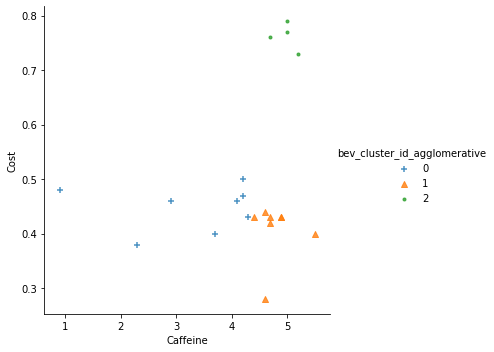

In [111]:
markers = ['+','^','.',]
sn.lmplot("Caffeine","Cost", data = bev, hue = "bev_cluster_id_agglomerative", markers = markers, fit_reg=False, height=5)

In [114]:
for x in range(3):
  print(bev[bev.bev_cluster_id_agglomerative == x],"\n")

                   Name  Potassium  Sodium  Caffeine  Cost  bev_cluster_id  \
2      stumpdown_coffee        157      15       0.9  0.48               0   
8   lavazza_super_crema         99      10       4.3  0.43               0   
9           mount_hagen        113       8       3.7  0.40               0   
11   peerless_wholebean        102      15       4.1  0.46               0   
12  stone_street_coffee        135      11       4.2  0.50               0   
15       caribou_coffee         68      15       2.3  0.38               0   
18      davidoff_coffee         72       6       2.9  0.46               0   
19            js_coffee         97       7       4.2  0.47               0   

    bev_cluster_id_agglomerative  
2                              0  
8                              0  
9                              0  
11                             0  
12                             0  
15                             0  
18                             0  
19               

In [115]:
for x in range(2):
  print(bev[bev.bev_cluster_id_agglomerative == x],"\n")

                   Name  Potassium  Sodium  Caffeine  Cost  bev_cluster_id  \
2      stumpdown_coffee        157      15       0.9  0.48               0   
8   lavazza_super_crema         99      10       4.3  0.43               0   
9           mount_hagen        113       8       3.7  0.40               0   
11   peerless_wholebean        102      15       4.1  0.46               0   
12  stone_street_coffee        135      11       4.2  0.50               0   
15       caribou_coffee         68      15       2.3  0.38               0   
18      davidoff_coffee         72       6       2.9  0.46               0   
19            js_coffee         97       7       4.2  0.47               0   

    bev_cluster_id_agglomerative  
2                              0  
8                              0  
9                              0  
11                             0  
12                             0  
15                             0  
18                             0  
19               

Conclusion



K Means and Agglomerative - boyh are different alogoritthms for clustering data depending upon the parameteres we provide, So in this experiment the difference between the both clustering methods ewere explored where we have two different set of results for each algorithms as methodsntioned above

Kneans uses the centroids to cluster the data whereas the agglomerative clustering algorithem uses top down or bottom up approach to cluster the data